### Data Description

The data is related with direct marketing campaigns of a
Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed.

### Objective

The classification goal is to predict if the client will subscribe
(yes/no) a term deposit (variable y)

### Attribute Classification

#### Bank Client Data

> **'Age:'** Numeric                                                                                                         
>**Job:** type of job (categorical:'admin.','blue-collar','entrepreneur','housemaid','management','retired','selfemployed',
'services','student','technician','unemployed','unknown')                                                                     
>**marital:** marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
>**education** -                                                                                                               
>**default:**  has credit in default? (categorical:'no','yes','unknown')                                                       
>**balance:** average yearly balance, in euros (numeric)                                                                      
>**housing:** has housing loan? (categorical:'no','yes','unknown')                                                             
>**loan:** has personal loan? (categorical: 'no','yes','unknown')                                                              
>**contact:** contact communication type (categorical:'cellular','telephone')

#### Client Contact Data

>**day:** last contact day of the month (numeric 1 -31)                                                                        
>**month:**: last contact month of year (categorical: 'jan', 'feb','mar', ..., 'nov', 'dec')                                   
>**duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model                                                                                           
>**campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)          
>**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means      client was not previously contacted)                                                                                           
>**previous:** number of contacts performed before this campaign and for this client (numeric)                                 
>**poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                     

#### Target Variable

>**target:** has the client subscribed a term deposit? (binary:"yes","no")

### Learning Outcomes:

> Exploratory Data Analysis                                                                                                    
> Preparing the data to train a model                                                                                           
> Training and making predictions using Ensemble Model                                                                         
> Tuning an Ensemble model                                                                                                    

### Steps and tasks:
1. Import the necessary libraries
2. Read the data as a data frame
3. Perform basic EDA which should include the following
and print out your insights at every step.
a. Shape of the data
b. Data type of each attribute
c. Checking the presence of missing values
d. 5 point summary of numerical attributes
e. Checking the presence of outliers
4. Prepare the data to train a model – check if data types are
appropriate, get rid of the missing values etc
5. Train a few standard classification algorithms, note and
comment on their performances along different metrics.
6. Build the ensemble models and compare the results with
the base models. Note: Random forest can be used only
with Decision trees.
7. Compare performances of all the models

### Import the necessary libraries

In [1]:
#Importing the necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

%matplotlib inline

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

### Read the data as a data frame

In [3]:
df = pd.read_csv('../../Data/bank-additional-full.csv', sep=';')  #Read the datafile as dataframe

### Perform basic EDA which should include the following and print out your insights at every step.

### Shape of the data

In [4]:
df_shape = df.shape                                          #View the shape of the dataset
print('Data has Rows {}, Columns {}'.format(*df_shape)) 

Data has Rows 41188, Columns 21


### Data type of each attribute

In [5]:
df.info()                                                    #Understand the various attributes of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

> There are two kinds of attributes objectand int. Consists of 10 object type and 7 int64 attributes. This will change as we need to convert the categorical variables 

### Checking the presence of missing values

In [6]:
df.apply(lambda x: sum(x.isnull()))              #Check if the dataset has any missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

> No missing values. If there are any missing values we can fill them with mean, median and mode

### 5 point summary of numerical attributes

In [7]:
df.describe().T                                    #Get the 5-point summary of data

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


> Looks like the features 'balance', 'duration', 'pdays' has lot of outliers with higher standard deviation

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


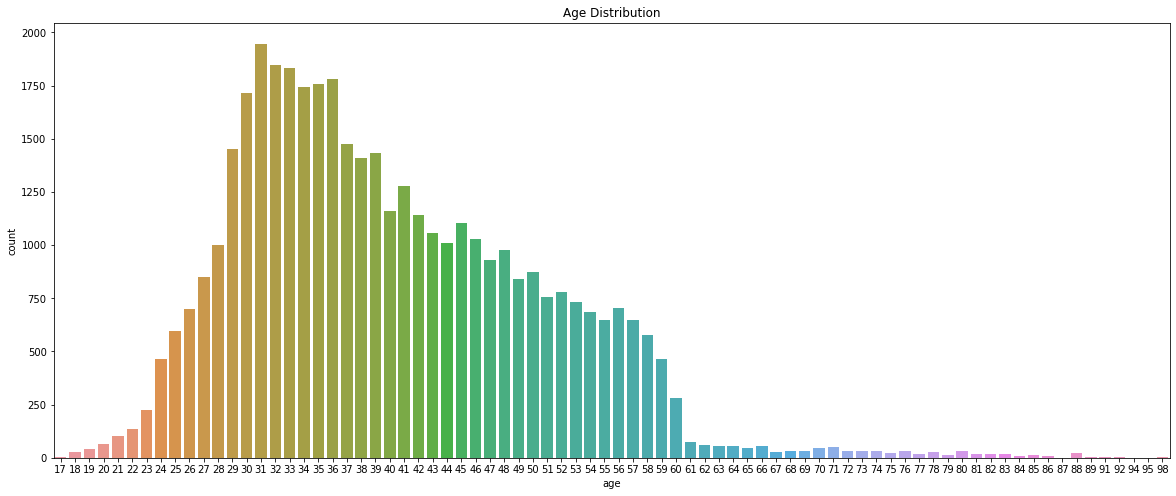

Maximum Age of client: 98
Minimum Age of client: 17
Minimum Age of client: 40.02406040594348


The Mean is: 40.02406040594348
The Standard Deviation is: 10.421249980934048
The Coefficient of variation is: 26


In [8]:
# Getting the distribution of 'age' variable
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

sns.countplot(df['age'])
plt.title('Age Distribution')
plt.show()

# Trying to understand the client's minimum and maximum age 
print('Maximum Age of client:', df['age'].max())
print('Minimum Age of client:', df['age'].min())
print('Minimum Age of client:', df['age'].mean())
print('\n')
# Let's see if there too much variance in the variable
print('The Mean is:', df['age'].mean())
print('The Standard Deviation is:', df['age'].std())
print('The Coefficient of variation is:', round(df['age'].std()*100 / df['age'].mean()))

> The variable is normally distributed. The average is 40 and there is not much of deviation from mean data seems to be good. The minimum age of client is 18 and upto clients with 95 years of age
Age which not much influence the target variable, just understanding the distribution

KeyError: 'balance'

<Figure size 720x576 with 0 Axes>

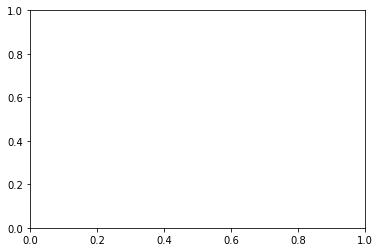

In [9]:
plt.figure(figsize=(10, 8))

df.plot.scatter('age', 'balance')
plt.title('Relationship between Age and Balance variable')

plt.show()

> Most balance is between the age group 30 to 60. And the balance after 60 years of age gets reduced becuase it's natural that the person retires after 60 years of age and the balance would not be as high as earlier 

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

sns.countplot(df['housing'], hue=df['default'], palette="ch:.25")

plt.show()

> There are no significant association between the housing loan and the default variable. 'Default' seems to be same among housing loan holders and no housing loan holders

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

sns.countplot(df['day'])
plt.title('Day of last contact')

plt.show()

> The last contact day for the campaign is on different date for different clients spaning to the entire month. However the most last contact calls is observed on 20th day of the month

In [ ]:
plt.figure(figsize=(10, 8))

df.plot.scatter('age', 'duration')
plt.title('Relationship between Age and Duration variable')

plt.show()

> The duration of the call is higher 30 to 60 age groups. May be we can expect more subcriptions from people within age group as it makes sense that persons within this age group would be employed which generate more transactions with the banks hence more possibility of subcription

In [ ]:
plt.figure(figsize=(20,8)) 
sns.countplot(df['month'], hue=df['Target'], palette="Set3")
plt.title('fig 1: Distribution of success rate for the year')

plt.figure(figsize=(20,10)) 
sns.countplot(df['job'], hue=df['Target'])
plt.title('fig 2: Understanding Employment data')

plt.show()

> Fig 1: Shows the distribution of subcription and otherwise across the year. Month of may being the highest in terms of both success and not success in getting the clients subcriptions. Dec being the lowest.                                             
> Fig 2: Shows the whether the clients subcribed or not across various job types. Management job has more 'yes' to term deposit, and but-color job has more 'no' to term deposits 

In [ ]:
plt.figure(figsize=(10, 8))

sns.distplot(df['duration'])
plt.show()

> Most of the call duration is within the 5mins of the call duration

In [ ]:
plt.figure(figsize=(15,8))

sns.scatterplot(x=df['campaign'], y=df['duration'], hue=df['Target'])

plt.show()

> The higher subcription rates is acheived within lesser number of contacts. As the percentage of contacts increase there are lesser chance of subcriptions

In [ ]:
plt.figure(figsize= (25,25))
plt.subplot(3,3,1)
sns.countplot(df.education, hue=df['default'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education')
plt.title('Education vs Default')

plt.subplot(3,3,2)
sns.countplot(df.marital, hue=df['default'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Marital')
plt.title('Marital Status vs Defaults')

plt.subplot(3,3,3)
sns.countplot(df.loan, hue=df['default'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Loan')
plt.title('Loan vs Default')

plt.subplot(3,3,4)
sns.countplot(df.housing, hue=df['default'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Housing')
plt.title('Housing vs Default')

plt.show()

> From the above graph we are trying to understand the relation between the two varaibles                               
> **Fig 1**: In the first plot the clients with secondary education background have higher defaults compared to rest           
> **Fig 2**: The second plot tells us who has defaults according to their marital status. The defaults are very much lower for each of the category however married clients seems to have higher in defaults                                                   
> **Fig 3**: There is no much difference in defaults among clients having loan and no loan                                    
> **Fig 4**: Here also the default among housing categories seems to be similar and very low

KeyError: 'Target'

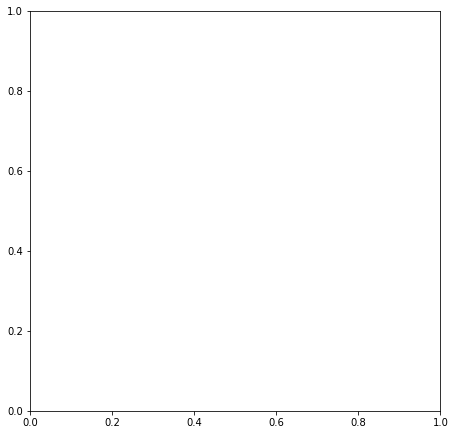

In [10]:
plt.figure(figsize= (25,25))
plt.subplot(3,3,1)
sns.countplot(df.education, hue=df['Target'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education')
plt.title('Fig 1: Education vs Target')

plt.subplot(3,3,2)
sns.countplot(df.marital, hue=df['Target'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Marital')
plt.title('Fig 2:Marital Status vs Target')

plt.subplot(3,3,3)
sns.countplot(df.loan, hue=df['Target'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Loan')
plt.title('Fig 3: Loan vs Target')

plt.subplot(3,3,4)
sns.countplot(df.housing, hue=df['Target'], color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Housing')
plt.title('Fig 4: Housing vs Target')

plt.show()

> **Fig 1:** People for secondary education has higher term deposits and also non-deposits followed by tertiary education. Primary being the lowest and we can also see there unidentified education type as well                                         
> **Fig 2:** People married subcribe more for term deposits but majority are not yet subcribed                                 
> **Fig 3:** Higher number of term deposits comes from non-personal loan holders, very minimal from personal holders           
> **Fig 4:** Similarly housing loan holders subcribe less to term deposits compared to non-housing loan holders                

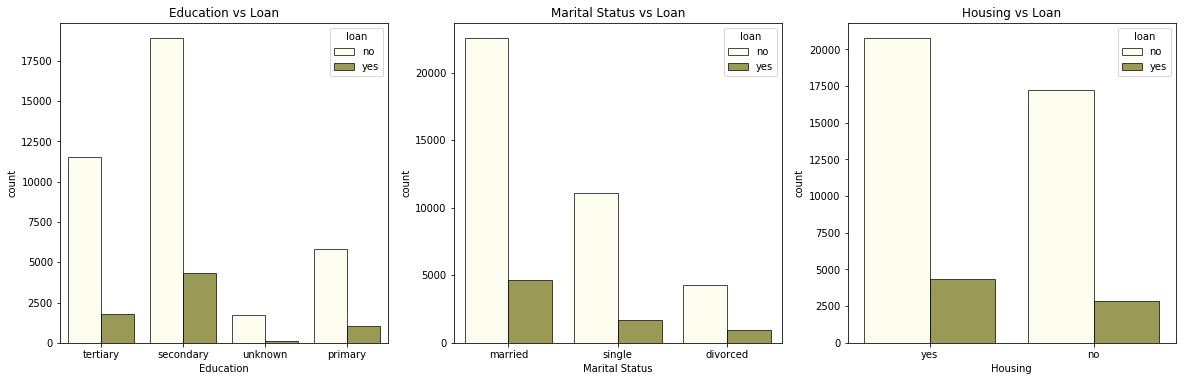

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.countplot(df.education, hue=df['loan'], color='olive', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education')
plt.title('Education vs Loan')

plt.subplot(3,3,2)
sns.countplot(df.marital, hue=df['loan'], color='olive', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Marital Status')
plt.title('Marital Status vs Loan')

plt.subplot(3,3,3)
sns.countplot(df.housing, hue=df['loan'], color='olive', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Housing')
plt.title('Housing vs Loan')

plt.show()

> From the above graph we are trying to understand the relation between the two varaibles                               
> **Fig 1**: Most of the loan holders are from secondary education background, then comes people from who are from tertiary education backgroud                                                                                                            
> **Fig 2**: It's understandable that the married people opt for loans due to various commitments followed by unmarried clients  
> **Fig 3**: Clients have housing loan is having personal loan as well even though it doesn't go together                       

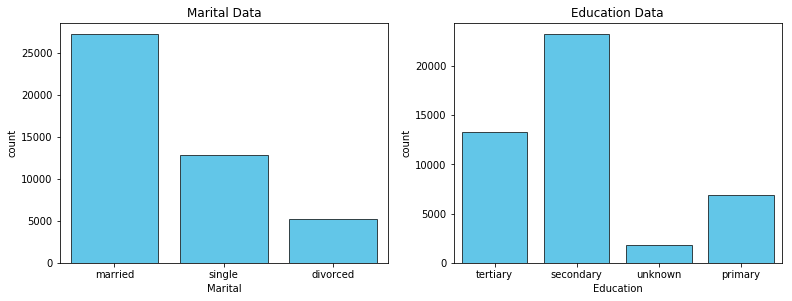

In [18]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(df.marital, color='deepskyblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Marital')
plt.title('Marital Data')

plt.subplot(3,3,2)
sns.countplot(df.education, color='deepskyblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Education')
plt.title('Education Data')

plt.show()

> **Marital Status:** Married category has the highest numbers, second comes single category followed by divorced               
>**Education Status:** Majority of the people are from secondary education background followed by tertiary education which is the third level education. There are few data where the education background is unknown 

Total number of Targets: 45211
Number of Target said yes: 5289
Number of Target said no: 39922


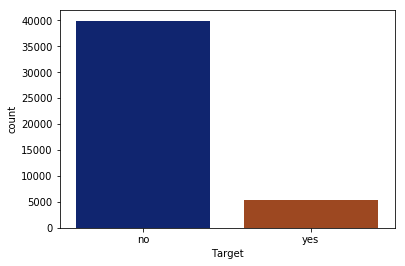

In [19]:
sns.countplot(df['Target'], palette='dark')

print('Total number of Targets:', df['Target'].count())
print('Number of Target said yes:', df[df['Target'] == 'yes'] ['age'].count())
print('Number of Target said no:', df[df['Target'] == 'no'] ['age'].count())

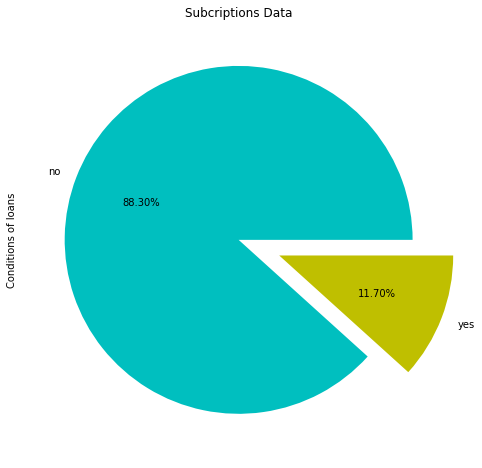

In [20]:
plt.figure(figsize=(10,8))

df['Target'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', colors='cyan')
plt.title('Subcriptions Data')
plt.ylabel('Conditions of loans')
plt.show()

> The total percentage of term deposit holders (subcribed) vs the rest

In [21]:
from sklearn.preprocessing import LabelEncoder      # Converting the labels into numeric form so as make it machine-learing form

job_enc = LabelEncoder()
df['job'] = job_enc.fit_transform(df['job']) 

marital_enc = LabelEncoder()
df['marital'] = marital_enc.fit_transform(df['marital'])

education_enc = LabelEncoder()
df['education'] = education_enc.fit_transform(df['education']) 

default_enc = LabelEncoder()
df['default'] = default_enc.fit_transform(df['default'])

housing_enc = LabelEncoder()
df['housing'] = housing_enc.fit_transform(df['housing'])

df['contact'] = df['contact'].fillna(df['contact'].mode())

contact_enc = LabelEncoder()
df['contact'] = contact_enc.fit_transform(df['contact'])

loan_enc = LabelEncoder()
df['loan'] = loan_enc.fit_transform(df['loan'])

Target_enc = LabelEncoder()
df['Target'] = Target_enc.fit_transform(df['Target']) 

In [22]:
#Assinging the value to each month in an year so it makes us easy to analyze

df.month[df.month == 'jan'] = 1
df.month[df.month == 'feb'] = 2
df.month[df.month == 'mar'] = 3
df.month[df.month == 'apr'] = 4
df.month[df.month == 'may'] = 5
df.month[df.month == 'jun'] = 6
df.month[df.month == 'jul'] = 7
df.month[df.month == 'aug'] = 8
df.month[df.month == 'sep'] = 9
df.month[df.month == 'oct'] = 10
df.month[df.month == 'nov'] = 11
df.month[df.month == 'dec'] = 12

df = df

In [23]:
#Even here we are assigning the value to each status of he 'poutcome' variable

df.poutcome[df.poutcome == 'failure'] = 0
df.poutcome[df.poutcome == 'success'] = 1
df.poutcome[df.poutcome == 'unknown'] = 'other'
df.poutcome[df.poutcome == 'other'] = 2

### Checking the presence of outliers

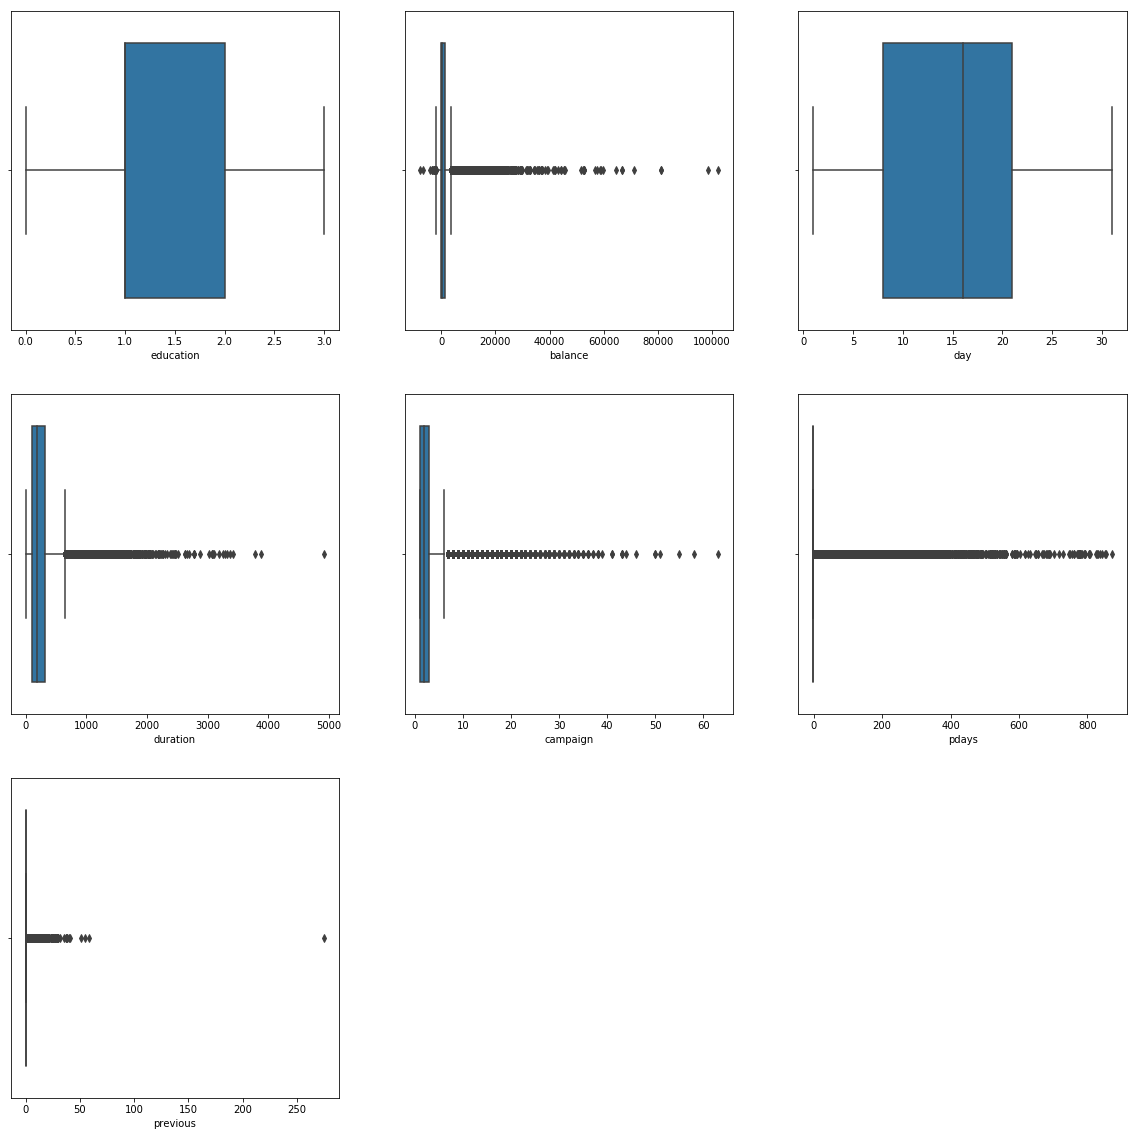

In [24]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(df.education) 

plt.subplot(3,3,2)
sns.boxplot(df.balance) 

plt.subplot(3,3,3)
sns.boxplot(df.day) 

plt.subplot(3,3,4)
sns.boxplot(df.duration)

plt.subplot(3,3,5)
sns.boxplot(df.campaign) 

plt.subplot(3,3,6)
sns.boxplot(df.pdays)

plt.subplot(3,3,7)
sns.boxplot(df.previous)

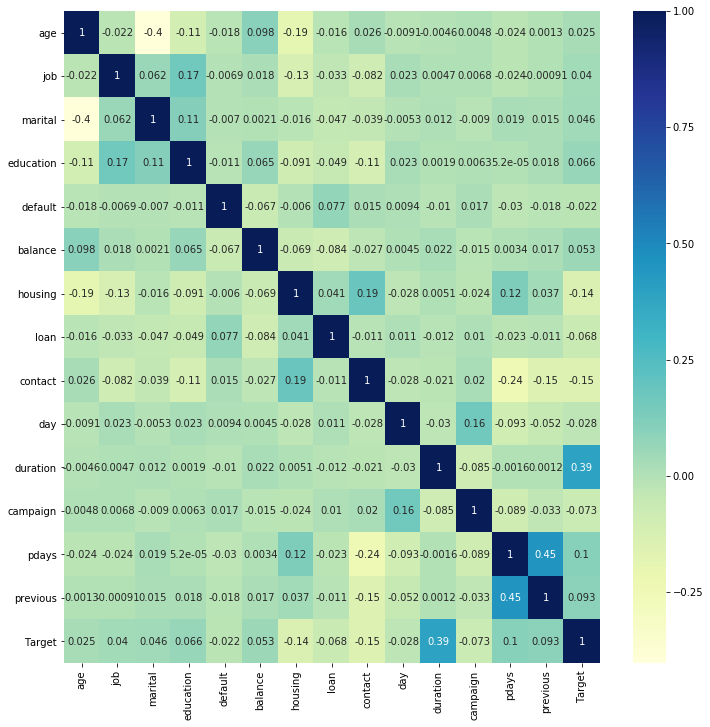

In [25]:
plt.subplots(figsize=(12,12))                  #Checking the correlation metrics between independent and dependent variables
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Split the dataset into features and target

In [26]:
X = df.drop(['Target'], axis=1)                         #Creating variable 'X' for independent features
y = df['Target']                                          #Creating variable 'y' for independent features

In [27]:
#Before we proceed in removing outliers we need to make sure that all our attributes are in integer format 

#df.info()                              

In [28]:
df = df.astype({"poutcome":'int32'})         #Converting 'poutcome' attribute to integer
df = df.astype({"month":'int32'})            #Converting the 'month' attribute to integer

### Removing Outliers

In [29]:
# It first computes the zscore for each value in the column, relative to the column mean and standard deviation
# Then it consideres the absolute z-score, only if it is below the threshold
# axis =1 applying to each row, all columns satisfy the constraint

from scipy import stats               #Importing the 'stats' as I need zscore librariy to set the threshold 
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]    

### Using Standard Scaler method to scale the dataframe

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
df_std = StandardScaler()

In [32]:
X = df_std.fit_transform(X)

### Data is now ready to train the model. I have tried two types of cross-validation method 

### Type 1: Using Stratified K-Fold

Provides train/test indices to split data in train/test sets. It rearranges the data in such a way that it represents the whole data. It is perticulary usefull where is the data has huge class imbalance.                                                    
The folds are selected so that the mean response value is approxmately equal in all the folds. In the case of binary classification, this means that each fold roughly contains the same proportions of the two types of class labels.              
Stratification is generally a better scheme, both in terms of bias and variance when compared to regular cross-validation

In [33]:
#from sklearn.model_selection import StratifiedKFold

#skf = StratifiedKFold(n_splits=6)
#skf.get_n_splits(X, y)

#for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]

> **The results from StraightKFold split model wasn't that good. I will try with another method called 'RepeatedKFold' let's see how it performs

### Type 2: Repeated K-Fold Validation

In this method the data is split into k-folds and repeated a numbe of times. The final model accuracy is taken as the mean from the number of repeats. I have considered 10-fold cross validation with 5 repeats on the training data set

In [34]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None)

for train_index, test_index in rkf.split(X):
    print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [    0     1     2 ... 45208 45209 45210] Validation: [    6    16    71 ... 45182 45186 45194]
Train: [    0     1     2 ... 45207 45208 45210] Validation: [    3    13    14 ... 45177 45179 45209]
Train: [    0     1     2 ... 45207 45209 45210] Validation: [   20    40    42 ... 45193 45203 45208]
Train: [    1     3     4 ... 45208 45209 45210] Validation: [    0     2     8 ... 45191 45192 45207]
Train: [    0     1     2 ... 45208 45209 45210] Validation: [    7     9    25 ... 45190 45197 45198]
Train: [    0     1     2 ... 45208 45209 45210] Validation: [   29    34    47 ... 45196 45199 45201]
Train: [    0     1     2 ... 45208 45209 45210] Validation: [   28    51    62 ... 45176 45200 45202]
Train: [    0     1     2 ... 45208 45209 45210] Validation: [    5    12    21 ... 45161 45195 45204]
Train: [    0     1     2 ... 45207 45208 45209] Validation: [   19    26    43 ... 45174 45205 45210]
Train: [    0     2     3 ... 45208 45209 45210] Validation: [    1     4

> Repeated K_Fold performs better than the stratified method. It was close to Stratifies method but scores around 2% better. Hence I consider this method to build the model 

**### Train a few standard classification algorithms, note and comment on their performances along different metrics.

### Machine Learning models used:
1. Support Vactor Machine Classifier
> SVM is a discriminative classifier formally defined by a separating hyperplane. Given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.                                                
2. Gaussian Naive Bayes
> The Naive Bayes classifier is a probabilistic machine learning model that's used for classification task. The crux of classifier is based on the Bayes theorem                                                                                       
Gaussian - When the predictors take up a continous value and are not discrete, we assume that these values are sampled from a gaussian distribution
3. K-Nearest Neighbour
    > KNN is a non-parametric method used for classification and regression. It consists of k closest training examples in the feature space. In Classification the output is a class membership. An object is classified by a plurality vote of its neighbours, with the object being assigned to the class most among its K nearest neighbors ( K is positive integer, typically the small) if k = 1 then the object is simply assigned to the same class of that single nearest neighbor
4. Logistic Regression
> A Supervised classification algorithm. It used Sigmoid function for classifying the binary labelled output variables. 
5. XGBoost
> eXtreme Gradient Boosting is a library of gradient boosting algorithms. It leverages the techniques mentioned with boosting and comes wrapped in easy to use library. Some major benefits includes highly scalable, quick to execute and out performs other algorithms. 
6. Decision Tree
> Is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule and each leaf node represents the outcome. Repetitively divides the working area into sub part by identifying lines. 
7. Decision Tree Entropy
> Entropy used to construct decision trees. To calculate the homogeneity of a sample. If the sample is completly homogeneous the entropy is zero and if the sample is equally divided then it has entropy of one. 
8. Random Forest
> A random forest is a meta estimator that fits a nummber of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
9. Adaboost Classifier
> The core definition of boosting is a method that converts weak leaners to strong learners and is typically applied to trees. Boosting Algorithm adds iterations of the model sequentially, adjusting the weights of the weak-learners along the way. This reduces the bias from the model and typically improves accuracy.  
10. Bagging Classifier
> Bootstrap Aggregation or Bagging has two distinct features. For training it leverages a Bootstrap procedure to separate the training data into different random subsamples. For prediction, a bagging classifier will use the prediction with the most votes from each model to produce its output and a bagging regression will take an average of all models to produce an output. 
11. GradientBoost Classifier
> Gradient boosted classification is an addictive training free classification method where trees are build in series and compared to each other based on mathematically derived score of splits. The trees are compared based on weighted leaf scores within each leaf 

### Support Vector Machines 

In [35]:
from sklearn import svm

svm = svm.SVC(probability=True, gamma='auto')
svm_model = svm.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

In [36]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

print('Accuracy', metrics.accuracy_score(y_test, svm_pred))
print('F1 core', metrics.f1_score(y_test, svm_pred))
print('\n')                                                                                                                
print('Scoring on Training Dataset', svm.score(X_train, y_train))
print('Scoring on Test Dataset', svm.score(X_test, y_test))
print('\n')                                                                                                                
print('Confusion matrix \n',confusion_matrix(y_test, svm_pred))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, svm_model.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, svm_model.predict(X)))

SVM = (cross_val_score(svm_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Accuracy 0.9059942490599425
F1 core 0.4248985115020298


Scoring on Training Dataset 0.9085278938314082
Scoring on Test Dataset 0.9059942490599425


Confusion matrix 
 [[3939   91]
 [ 334  157]]


AUC Score 0.9009313529126171
roc_auc_score 0.6635636503850308


### Notes on Results:
1. Accuracy: Score is good
2. F1 Score: Score is bit low
3. Results on Training and Test dataset looks good which tell us that there is no Overfitting or Underfitting issues
4. AUC is pretty good

### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
NB_model = naive_model.fit(X_train, y_train)
NB_predict = naive_model.predict(X_test)

print('Accuracy Score for Naive Bayes Classifier is:', metrics.accuracy_score(y_test, NB_predict))
print('F1 Score for Naive Bayes Classifier is:', metrics.f1_score(y_test, NB_predict))
print('\n')                                                                                                                
print('Scoring on Training Data:', naive_model.score(X_train, y_train)) 
print('Scoring on Test Data:', naive_model.score(X_test, y_test)) 
print('\n')                                                                                                                                                                                                                               
print('Confusion matrix', '\n', confusion_matrix(y_test, NB_predict))
print('\n')                                                                                                                

false_positive_rate, true_positive_rate, thresholds = roc_curve(y, NB_model.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, NB_model.predict(X)))

Gausian = (cross_val_score(naive_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Accuracy Score for Naive Bayes Classifier is: 0.8281353682813537
F1 Score for Naive Bayes Classifier is: 0.3857707509881423


Scoring on Training Data: 0.8281150159744409
Scoring on Test Data: 0.8281353682813537


Confusion matrix 
 [[3500  530]
 [ 247  244]]


AUC Score 0.813744463833422
roc_auc_score 0.6841123135851345


### Notes on Results:

1. Accuracy: Score is ok but not that great 
2. F1 Score: Score is also bit too low
3. Results on Training and Test dataset looks good which tell us that there is no Overfitting and Underfitting issues
4. AUC is also low

### KNN 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

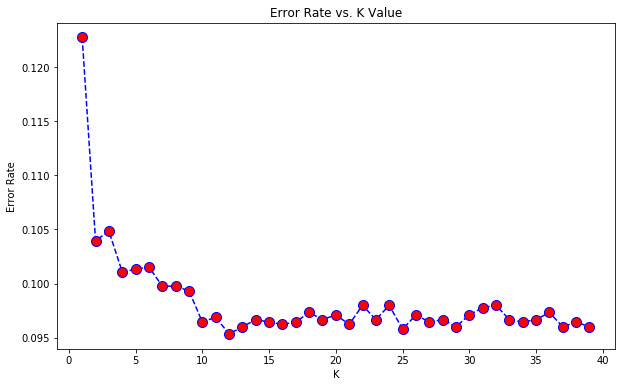

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate') 

In [41]:
#FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('**Accuracy for KNN classifier is:', metrics.accuracy_score(y_test, pred))
print('**F1_score for KNN classifier is:', metrics.f1_score(y_test, pred))

**Accuracy for KNN classifier is: 0.8772395487723955
**F1_score for KNN classifier is: 0.41145281018027574


In [42]:
#Now with K=5

KNN_model = KNeighborsClassifier(n_neighbors=32, weights = 'distance')
knn_model = KNN_model.fit(X_train, y_train)
knn_predict = KNN_model.predict(X_test)

print('**Accuracy for KNN classifier is:', metrics.accuracy_score(y_test, knn_predict))
print('**F1_score for KNN classifier is:', metrics.f1_score(y_test, knn_predict))
print('\n')
print('Scoring on Training Dataset is:', KNN_model.score(X_train, y_train))
print('Scoring on Test Dataset is:', KNN_model.score(X_test, y_test))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, knn_model.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, knn_model.predict(X)))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, knn_predict))

knn = (cross_val_score(KNN_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

**Accuracy for KNN classifier is: 0.9037823490378235
**F1_score for KNN classifier is: 0.3794579172610557


Scoring on Training Dataset is: 1.0
Scoring on Test Dataset is: 0.9037823490378235


AUC Score 0.996769613016132
roc_auc_score 0.9651917926475819


Confusion matrix 
 [[3953   77]
 [ 358  133]]


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score is too low
3. Model score on Training shows 1 which might not be realistically correct
4. AUC is also close to 1 which might not be realistically correct
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
LG_model = logit_model.fit(X_train, y_train)

logit_predict = logit_model.predict(X_test)

print('Accuracy for Logistic Regression model is:', metrics.accuracy_score(y_test, logit_predict))
print('F1_score for Logistic Regression model is:', metrics.f1_score(y_test, logit_predict))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, logit_predict))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, LG_model.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, LG_model.predict(X)))
print('\n')
print('Scoring on Training Data:', logit_model.score(X_train, y_train)) 
print('Scoring on Test Data:', logit_model.score(X_test, y_test)) 

LogitRegression = (cross_val_score(logit_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy for Logistic Regression model is: 0.8951559389515594
F1_score for Logistic Regression model is: 0.29881656804733725


Confusion matrix 
 [[3946   84]
 [ 390  101]]


AUC Score 0.8706538726125701
roc_auc_score 0.5965211359541918


Scoring on Training Data: 0.8900221184566233
Scoring on Test Data: 0.8951559389515594


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logis

### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score is too low
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model

#### XGBoost

In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)

print('**Scoring on Training Data:', xgb.score(X_train, y_train)) 
print('**Scoring on Test Data:',xgb.score(X_test, y_test))
print('\n')
print('**Accuracy for XGBoost classifier is:', metrics.accuracy_score(y_test, xgb_predict))
print('**F1_score for XGBoost classifier is:', metrics.f1_score(y_test, xgb_predict))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, xgb_predict))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, xgb_model.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, xgb_model.predict(X)))

XGBoost = (cross_val_score(xgb, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

**Scoring on Training Data: 0.9062668960432538
**Scoring on Test Data: 0.9095332890953329


**Accuracy for XGBoost classifier is: 0.9095332890953329
**F1_score for XGBoost classifier is: 0.47361647361647363


Confusion matrix 
 [[3928  102]
 [ 307  184]]


AUC Score 0.9292148309926611
roc_auc_score 0.6736833341370371


### Notes on Results:

1. Accuracy is score is very good 
2. F1 Score score is low 
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model

In [45]:
from sklearn.ensemble import VotingClassifier

v_clf = VotingClassifier(estimators=[('svm',svm_model),('NB',NB_model),('knn',knn_model),('Logistic',LG_model),
                                    ('xgb',xgb_model)], voting='hard')

vclf_model = v_clf.fit(X_train, y_train)

pred_vclf =v_clf.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, pred_vclf))
print('F1_Score:', metrics.f1_score(y_test, pred_vclf))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_vclf))
print('\n')
print('Training Score:', vclf_model.score(X_train, y_train))
print('Testing Score:', vclf_model.score(X_test, y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy: 0.904888299048883
F1_Score: 0.4189189189189189


Confusion matrix 
 [[3936   94]
 [ 336  155]]


Training Score: 0.9162693536495453
Testing Score: 0.904888299048883


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score is low
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model

### 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees

### Creating a decision tree model using 'entropy' method of finding the split columns and fit to training data

### Decision Tree 

In [46]:
#Invoking the Decision Tree classifier function using 'Entropy' method of finding the split columns. 
#Other option could be gini index and also restricting the depth of the tree to 5 (just a random number)

from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy')
entropy_model = model_entropy.fit(X_train, y_train)

In [47]:
DT_predict = model_entropy.predict(X_test)

print('**Accuracy for Decision Tree classifier is:', metrics.accuracy_score(y_test, DT_predict))
print('**F1_score for Decision Tree classifier is:', metrics.f1_score(y_test, DT_predict))
print('\n')
print('Confusion matrix', confusion_matrix(y_test, DT_predict))
print('\n')
print('**Scoring on Training Data is:', model_entropy.score(X_train, y_train))
print('**Scoring on Test Data is:', model_entropy.score(X_test, y_test))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, entropy_model.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, entropy_model.predict(X)))

DecisionTree = (cross_val_score(model_entropy, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

**Accuracy for Decision Tree classifier is: 0.880557398805574
**F1_score for Decision Tree classifier is: 0.468503937007874


Confusion matrix [[3743  287]
 [ 253  238]]


**Scoring on Training Data is: 1.0
**Scoring on Test Data is: 0.880557398805574


AUC Score 0.9724879259498355
roc_auc_score 0.9724879259498355


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score highest compared to earlier models 
3. Model score on Training and Test dataset is good
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model. False Positives rate pretty high.

#### Decision Tree Purned - The above error can reduced bypurned/regularize method basically by reducing the depth of the decision tree

In [48]:
clf_pruned = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth = 4, min_samples_leaf=5)
pruned_clf = clf_pruned.fit(X_train, y_train)   #Fitting the training to the model 

In [49]:
clf_pruned.score(X_train, y_train)
clf_pruned.score(X_test, y_test)

dtentropy_predict = clf_pruned.predict(X_test)

print('**Accuracy for Decision Tree with Entropy is:', metrics.accuracy_score(y_test, dtentropy_predict))
print('**F1_score for Decision Tree with Entropy is:', metrics.f1_score(y_test, dtentropy_predict))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, dtentropy_predict))
print('\n')
print('Training Score is:', clf_pruned.score(X_train, y_train))
print('Test Score is:', clf_pruned.score(X_test, y_test))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, pruned_clf.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, pruned_clf.predict(X)))

DecisionTree_Entropy = (cross_val_score(clf_pruned, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

**Accuracy for Decision Tree with Entropy is: 0.8942711789427118
**F1_score for Decision Tree with Entropy is: 0.28656716417910444


Confusion matrix 
 [[3947   83]
 [ 395   96]]


Training Score is: 0.888891619562546
Test Score is: 0.8942711789427118


AUC Score 0.864183692895796
roc_auc_score 0.5885958996484817


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score is very very low 
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model

### Visualizing the tree

In [50]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
import collections
import matplotlib.image as mpimg
from IPython.display import Image

ModuleNotFoundError: No module named 'pydotplus'

In [51]:
data_feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', ]

In [52]:
data = tree.export_graphviz(clf_pruned, feature_names=data_feature_names, out_file=None,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
    
for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
graph.write_png('tree.png')
Image(graph.create_png())

NameError: name 'tree' is not defined

### Tree regularaised

In [53]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(df, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.619918
pdays,0.149146
contact,0.118550
housing,0.093113
month,0.019274
age,0.000000
job,0.000000
marital,0.000000
education,0.000000
default,0.000000


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)

rf_predict = rfcl.predict(X_test)

print('Accuracy Score is:', metrics.accuracy_score(y_test, rf_predict))
print('F1 Score is:', metrics.f1_score(y_test, rf_predict))
print('\n')

print('Confusion matrix', '\n', confusion_matrix(y_test, rf_predict))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, rfcl.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, rfcl.predict(X)))
print('\n')
print('Training Score is:', rfcl.score(X_train, y_train))
print('Test Score is:', rfcl.score(X_test, y_test)) 

RandomForest = (cross_val_score(rfcl, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Accuracy Score is: 0.9055518690555187
F1 Score is: 0.47863247863247865


Confusion matrix 
 [[3898  132]
 [ 295  196]]


AUC Score 0.9965446564836221
roc_auc_score 0.9703641708061671


Training Score is: 0.9999754239370853
Test Score is: 0.9055518690555187


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score is higher to Decision Tree model which has the best score earlier
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model. False Positive rates is not that great

### Apply Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB =abcl.predict(X_test)

print('Accuracy Score is:', metrics.accuracy_score(y_test, pred_AB))
print('F1 Score is:', metrics.f1_score(y_test, pred_AB))
print('\n')
print('Training Score is:',abcl.score(X_train, y_train)) 
print('Test Score is:',abcl.score(X_test, y_test)) 
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, abcl.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, abcl.predict(X)))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_AB))

Adaboost = (cross_val_score(abcl, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Accuracy Score is: 0.8947135589471356
F1 Score is: 0.21710526315789472


Training Score is: 0.8888424674367167
Test Score is: 0.8947135589471356


AUC Score 0.8883741806638278
roc_auc_score 0.5720295955445506


Confusion matrix 
 [[3979   51]
 [ 425   66]]


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score is too low
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model. False Positve Rate is lower.

### Apply Bagging

In [56]:
from sklearn.ensemble import BaggingClassifier           #Importing the necessary libraries 

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap = True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG =bgcl.predict(X_test)

print('Accuracy Score is:', metrics.accuracy_score(y_test, pred_BG))
print('F1 Score is:', metrics.f1_score(y_test, pred_BG))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_BG))
print('\n')
print('Training Score is:', bgcl.score(X_train, y_train))
print('Test Score:', bgcl.score(X_test, y_test))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, bgcl.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, bgcl.predict(X)))

Bagging = (cross_val_score(bgcl, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Accuracy Score is: 0.9073213890732139
F1 Score is: 0.5211428571428571


Confusion matrix 
 [[3874  156]
 [ 263  228]]


Training Score is: 0.9959203735561563
Test Score: 0.9073213890732139


AUC Score 0.9949781280341059
roc_auc_score 0.958392444866658


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score is best to any other models 
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model. False Positve Rate is bit higher 

### Apply GradientBoost Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

pred_GB =gbcl.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, pred_GB))
print('F1_Score:', metrics.f1_score(y_test, pred_GB))
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_GB))
print('\n')
print('Training Score:', gbcl.score(X_train, y_train))
print('Testing Score:', gbcl.score(X_test, y_test))
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, gbcl.predict_proba(X)[:,1])
print('AUC Score',auc(false_positive_rate, true_positive_rate))
print('roc_auc_score',roc_auc_score(y, gbcl.predict(X)))

GradientBoost = (cross_val_score(gbcl, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

Accuracy: 0.9101968591019686
F1_Score: 0.4873737373737374


Confusion matrix 
 [[3922  108]
 [ 298  193]]


Training Score: 0.9080363725731138
Testing Score: 0.9101968591019686


AUC Score 0.9319688660424224
roc_auc_score 0.6907789129055013


### Notes on Results:

1. Accuracy is score is good 
2. F1 Score score is decent 
3. Model score on Training and Test dataset is good which tell us no Overfitting/Undersitting of the model
4. AUC score is good
5. Confusion matrix shows values for TN, TP, FP and FN. Our aim is to get the lower False Positive which is pretty good in this model. False Positve Rate is not that great

### Knowing the AUROC score for each of the classifier

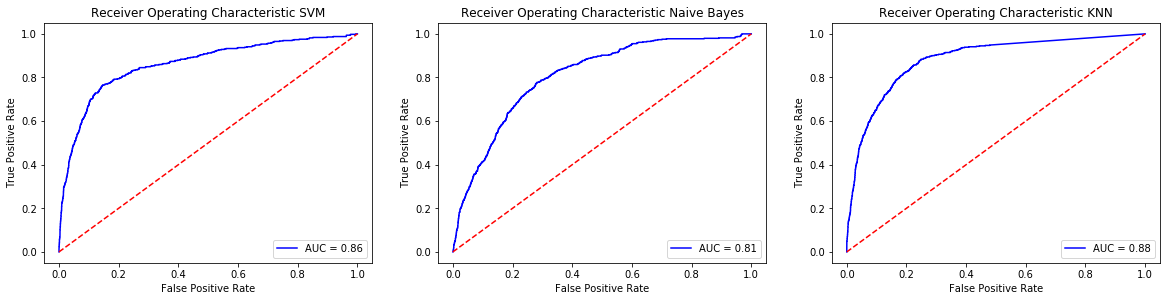

Text(0.5, 0, 'False Positive Rate')

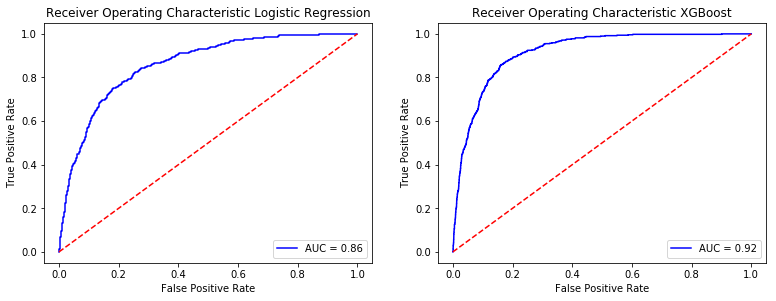

In [58]:
plt.figure(figsize=(20,15))

probs = svm_model.predict_proba(X_test)                              #ROC Curve for svm 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,1)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic SVM')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = NB_model.predict_proba(X_test)                               #ROC Curve for Naive Bayes 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,2)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Naive Bayes')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = KNN_model.predict_proba(X_test)                              #ROC Curve for KNN 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,3)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic KNN')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure(figsize=(20,15))
probs = logit_model.predict_proba(X_test)                            #ROC Curve for Logistic Regression
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,4)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = xgb.predict_proba(X_test)                                    #ROC Curve for XGBoost
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,5)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic XGBoost')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Knowing the AUROC score for Ensemble Methods

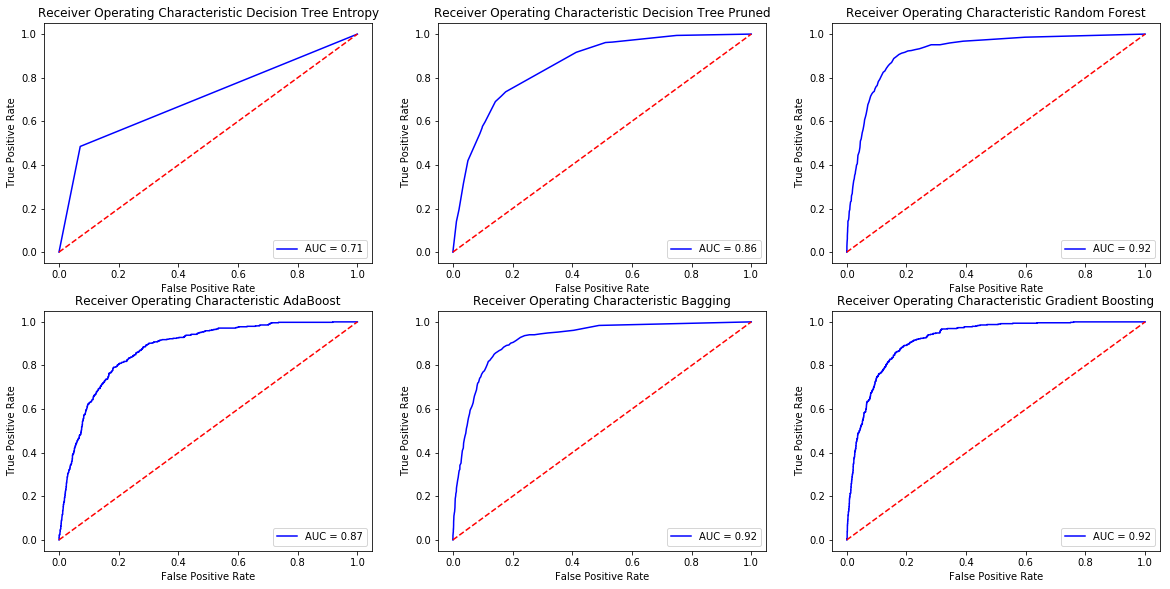

In [59]:
probs = model_entropy.predict_proba(X_test)                        #ROC Curve for Decision Tree with Entropy 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Decision Tree Entropy')
plt.legend(loc = 'lower right') 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = clf_pruned.predict_proba(X_test)                          #ROC Curve for Decision Tree Purned
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,2)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Decision Tree Pruned')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = rfcl.predict_proba(X_test)                                 #ROC Curve for Random Forest 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,3)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Random Forest')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = abcl.predict_proba(X_test)                                 #ROC Curve for AdaBoost 
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,4)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic AdaBoost')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = bgcl.predict_proba(X_test)                                 #ROC Curve for Bagging
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,5)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Bagging')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = gbcl.predict_proba(X_test)                                 #ROC Curve for GradientBoost
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.subplot(3,3,6)
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Gradient Boosting')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 7. Compare performances of all the models

In [60]:
models = pd.DataFrame({'Models': ['Gausian', 'knn', 'LogitRegression', 'GradientBoost', 'Bagging',
                                 'Adaboost', 'XGBoost', 'DecisionTree', 'DecisionTree_Entropy', 'RandomForest'],
                       'Score': [Gausian, knn, LogitRegression, GradientBoost, Bagging, Adaboost, XGBoost, DecisionTree, 
                                 RandomForest, DecisionTree_Entropy]})
models.sort_values(by='Score', ascending = False)

,Models,Score
8,DecisionTree_Entropy,0.905038
4,Bagging,0.904571
3,GradientBoost,0.903908
6,XGBoost,0.902974
1,knn,0.896830
2,LogitRegression,0.889703
5,Adaboost,0.888007
9,RandomForest,0.887687
7,DecisionTree,0.877390
0,Gausian,0.828336


### Concluding

> **Final Result:** 
From all the above models **Decision Tree with Bagging method** performed better with Accuracy - 90%, F1 Score - 52%, AUC - 99%. Scored well on training and test data as well no issues of overfitting/underfitting.                                      
Another important metric to note is **cross_val_score** which considers **mean** of each fold. 
There are two top methods whose scores are high first is DecisionTree_Entropy method and second one is the 'bagging' method has the pretty good score as well. 

### Below are the metrics used for each model to know the its performance
1. **Accuracy:** One metric for evaluating classification model. Accuracy the fraction of predictions our model got right. It is calculated in terms of positive and negatives values                                                                          
Accuracy =  True Positive + True Negative / True Positives + True Negatives + False Positives + False Negatives                                                                                                                                                                                               


2. **F1 Score:** It considers both the precision p and recall r of the test to compute the score. p is the number of correct positive results divided by the number of all positive results                       


3. **AUROC Score:** This score gives us a good idea of how well the model performed. Basically helps to determine which of the used models predicts the classes best


4. **cross_val_score:** The accuracy of the model is the average of the accuracy of each fold


5. **Scoring on Training and Testing dataset using model.score():** Estimators implement a score method. Scores are between 0 and 1m with a larger score indicating a better fit. 
This is used to check whether the model has any underfitting or overfitting issues. 
Overfitting: Where the model observes more noise from the training data, while performing poorly on the new data set i.e Test data.
Underfitting: Where the model poorly performs on the training data by not considering the significant features


6. **Confusion Matrix:** Used to get the performance of the model on a set of test data for which the true values are known

### Manual calculation of Gradient Boosting as an example to show how various matrics works

**Accuracy:** (tp + tn) / (p + n) = 211+3870 / 330 + 4191 = 4081 / 4521 = 0.902676399026764

**Precision:** tp / (tp + fp) = 211 / (211 + 119) = 211 / 330 = 0.6393939393939394

**Recall:** tp / (tp + fn) = 211 / (211 + 321) = 211 / 532 = 0.3966165413533835 

**F1:** 2 tp / (2 tp + fp + fn) = 2 211 / (2 211 + 119 + 321) = 422 / (422 + 119 + 321) = 422 / 862 = 0.4895591647331787 

### Thank you